##  House Price Prediction using Machine Learning

In [7]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.4 MB/s eta 0:00:0000:0100:01m


In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore") 


In [9]:
df = pd.read_csv("/Users/chinmaysalgaonkar/Downloads/Database/Boston_housing_data.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
df.shape

(506, 14)

In [11]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [12]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
# correlation

In [19]:
correlation = df.corr()

<AxesSubplot:>

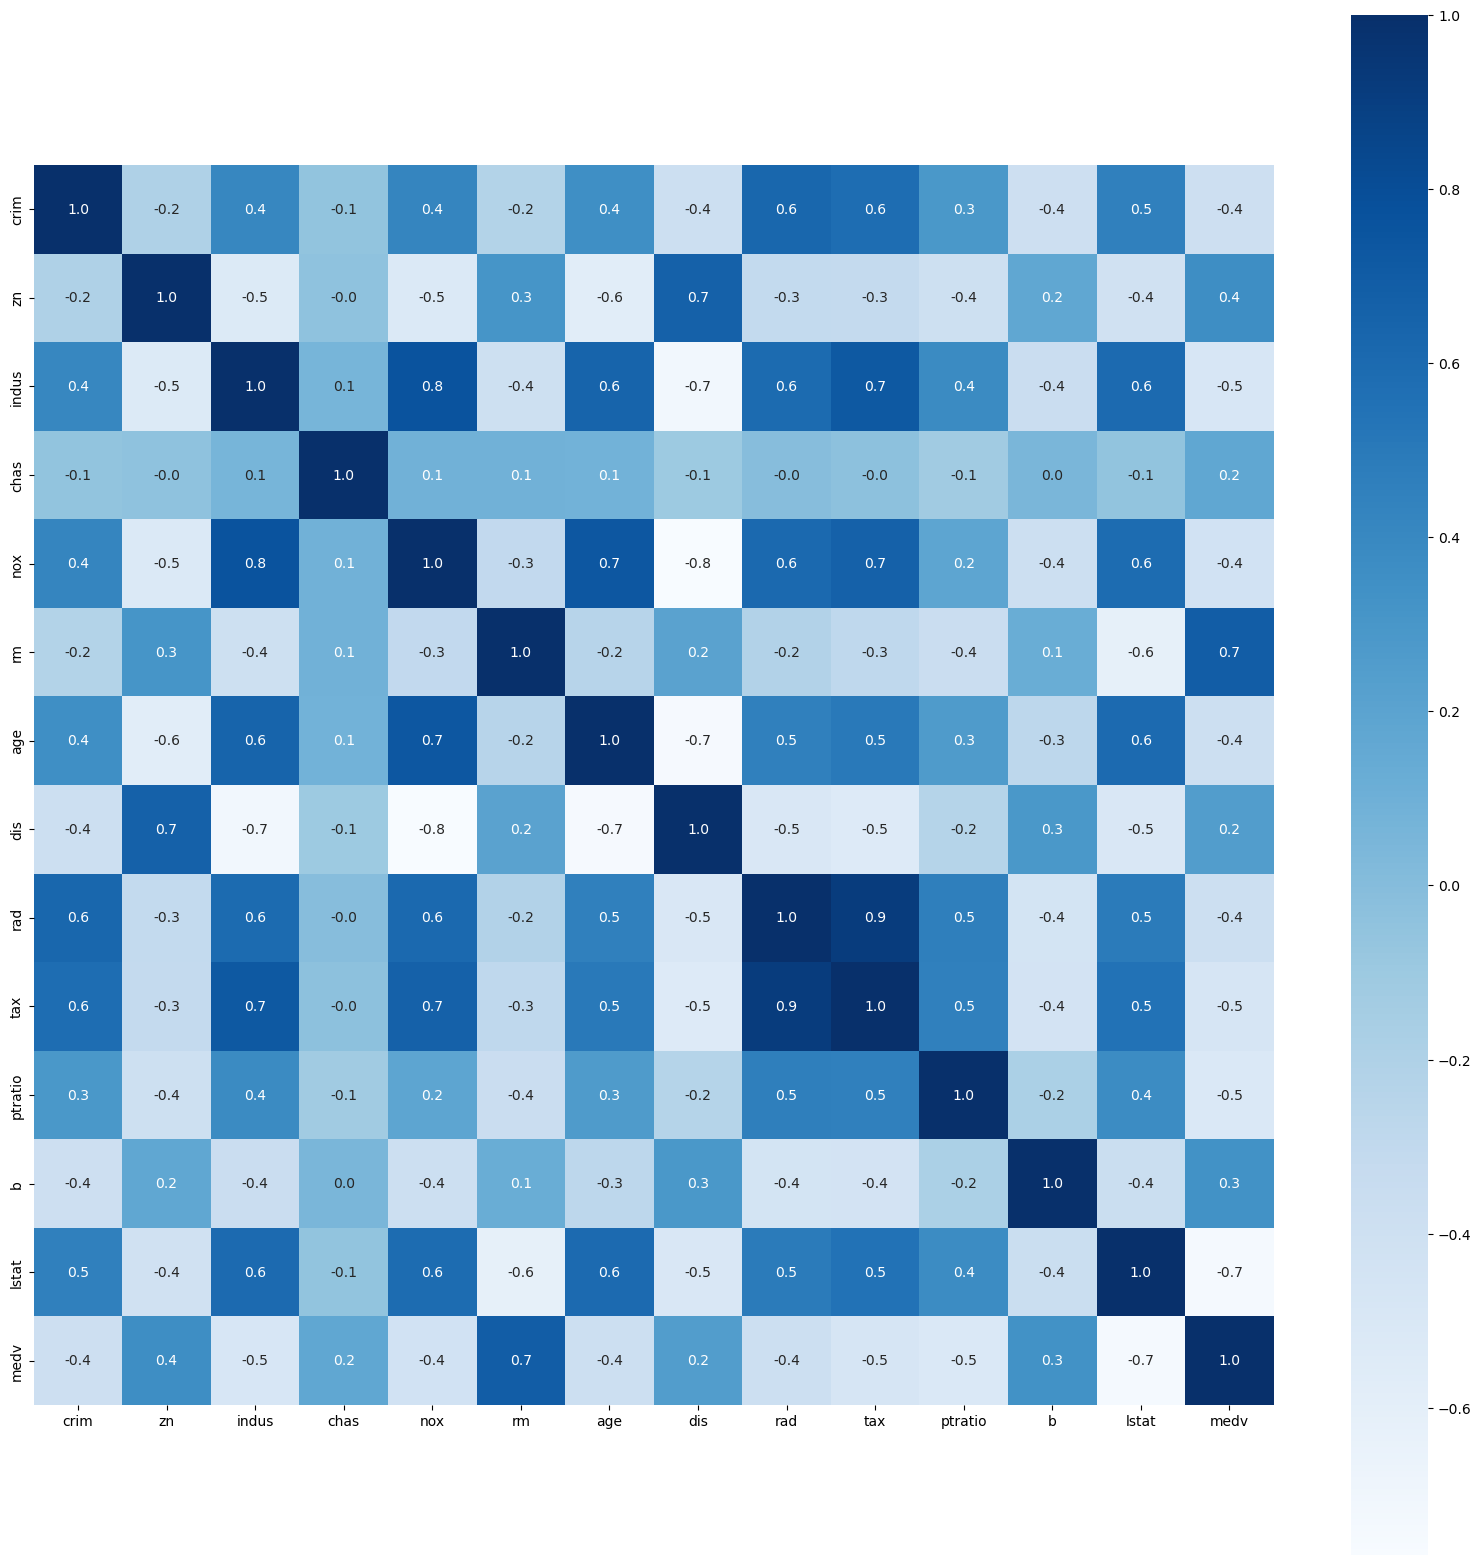

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation,cbar=True,square=True,cmap='Blues',fmt='.1f',annot=True)

In [25]:
x = df.iloc[:,:-1]
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [26]:
y = df.iloc[:,-1]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

## Splitting Model

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(404, 13) (102, 13) (404,) (102,)


## Model Training

In [30]:
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

## Model Evaluation

In [36]:
# train data

In [33]:
training_predict = model.predict(x_train)
training_predict

array([25.245571 , 23.32921  ,  7.210682 , 21.154896 , 11.702352 ,
       26.999006 , 29.584614 , 26.544731 , 43.50524  , 23.625568 ,
       11.002917 , 33.40945  , 36.007214 , 36.40028  , 19.037712 ,
       20.18499  , 34.905746 , 49.99532  , 19.321676 , 14.898901 ,
       26.617535 , 19.894657 , 24.802687 , 21.180086 , 23.923895 ,
       20.586973 , 23.074522 , 27.950964 , 19.987543 , 23.094906 ,
       25.010534 ,  9.705043 , 23.892748 , 36.09172  , 13.418543 ,
       12.731809 , 39.79168  , 10.393237 , 20.598629 , 17.775103 ,
       19.482315 , 23.710855 , 28.513987 , 24.29506  , 23.771362 ,
       19.072584 , 28.377209 , 20.49642  , 33.825535 , 14.507262 ,
       20.39619  , 16.009405 , 13.304443 , 30.793392 , 27.49651  ,
       24.428276 , 24.389343 , 25.122246 , 43.8164   , 21.898586 ,
       26.22088  , 14.255268 , 20.789656 , 20.105751 , 23.099632 ,
       13.068087 , 16.195873 , 24.834087 , 20.208426 , 22.484184 ,
       14.791592 , 28.696594 , 20.114979 , 23.412987 , 31.9928

## visualize

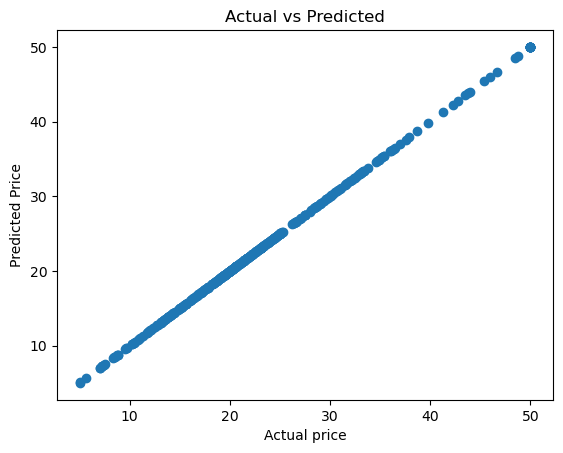

In [43]:
plt.scatter(y_train,training_predict)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

## R Squared Error

In [34]:
score_1 = metrics.r2_score(y_train,training_predict)
score_1

0.9999952977725205

In [35]:
score_2 =metrics.mean_absolute_error(y_train,training_predict)
score_2

0.01375658535721277

In [38]:
# Test data

In [37]:
test_predict = model.predict(x_test)
test_predict

array([30.359884, 27.026636, 19.17616 , 21.448114, 20.703493, 20.424747,
       27.9036  , 17.878405, 21.678137, 23.36513 , 25.411674, 33.19199 ,
       21.495481, 19.939993, 19.990822, 28.529932, 13.219593, 44.483154,
       25.460302, 11.562899, 19.486588, 17.153116, 24.325785, 23.509218,
       27.791344,  8.616411, 14.683976, 19.01615 , 45.651524, 12.10203 ,
       22.976582, 17.523937, 48.34446 , 16.573458, 24.024517, 21.818398,
       14.679352, 35.878193, 16.073364, 20.764208, 25.262817, 22.376215,
       24.78839 , 14.799538, 16.877083, 11.262062, 46.995094, 11.280138,
       21.217411, 18.637756, 23.77302 , 20.691387, 25.980684, 20.501291,
        8.173699, 22.731295, 11.759897, 24.526464, 18.271172, 38.32712 ,
       12.570583, 25.870787, 12.011916, 13.295293, 17.679295, 35.901722,
       37.55958 , 23.164257, 20.201231, 20.955679, 24.68425 ,  7.049963,
       18.19561 , 19.824377, 19.77468 , 20.867382, 40.98662 , 24.473787,
       27.369884, 31.096327, 16.441713, 19.326612, 

In [40]:
score_1 = metrics.r2_score(y_test,test_predict)
print("R2 Score :",score_1)
score_2 =metrics.mean_absolute_error(y_test,test_predict)
print("Mean absolute Score :",score_2)

R2 Score : 0.9085331557145866
Mean absolute Score : 2.344013180452235


In [44]:
## visualize

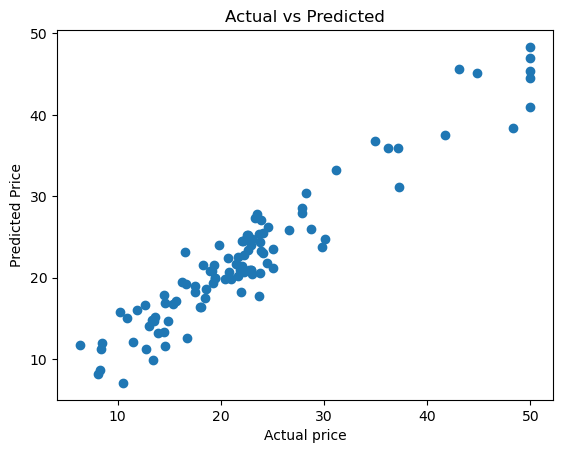

In [45]:
plt.scatter(y_test,test_predict)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()